<a href="https://colab.research.google.com/github/junisha25/Computational-Finance-2025-26/blob/main/meta_updated_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
df=pd.read_excel('/content/META Historical Data (1).xlsx')
# Assuming the data is in the first column and tab-separated, split it into multiple columns
df = df[df.columns[0]].str.split('\t', expand=True)

df

,0,1,2,3,4,5,6
0,18-08-2025,767.37,775.09,775.81,756.56,16.51M,-2.27%
1,15-08-2025,785.23,784.15,796.25,780.82,13.38M,0.40%
2,14-08-2025,782.13,777.88,787.81,772.51,8.12M,0.26%
3,13-08-2025,780.08,791.15,795.46,778.23,8.81M,-1.26%
4,12-08-2025,790,773,793.67,772.43,14.58M,3.15%
5,11-08-2025,765.87,770.08,773.46,764.67,7.61M,-0.45%
6,08-08-2025,769.3,762.75,769.9,758.58,7.32M,0.98%
7,07-08-2025,761.83,773.49,775,759.55,9.02M,-1.32%
8,06-08-2025,771.99,770,773.64,760.46,9.73M,1.12%
9,05-08-2025,763.46,776.45,783.13,763,11.64M,-1.66%


In [50]:
df.columns = ['date', 'closing price', 'opening price', 'high', 'low', 'volume', 'percentage change']
display(df.head())

,date,closing price,opening price,high,low,volume,percentage change
0,18-08-2025,767.37,775.09,775.81,756.56,16.51M,-2.27%
1,15-08-2025,785.23,784.15,796.25,780.82,13.38M,0.40%
2,14-08-2025,782.13,777.88,787.81,772.51,8.12M,0.26%
3,13-08-2025,780.08,791.15,795.46,778.23,8.81M,-1.26%
4,12-08-2025,790,773,793.67,772.43,14.58M,3.15%


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   date               22 non-null     object
 1   closing price      22 non-null     object
 2   opening price      22 non-null     object
 3   high               22 non-null     object
 4   low                22 non-null     object
 5   volume             22 non-null     object
 6   percentage change  22 non-null     object
dtypes: object(7)
memory usage: 1.3+ KB


In [52]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')
numerical_cols = ['closing price', 'opening price', 'high', 'low']
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col])

# Clean and convert 'volume' column
df['volume'] = df['volume'].str.replace('M', '').astype(float) * 1_000_000

# Clean and convert 'percentage change' column
df['percentage change'] = df['percentage change'].str.replace('%', '').astype(float)

display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               22 non-null     datetime64[ns]
 1   closing price      22 non-null     float64       
 2   opening price      22 non-null     float64       
 3   high               22 non-null     float64       
 4   low                22 non-null     float64       
 5   volume             22 non-null     float64       
 6   percentage change  22 non-null     float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 1.3 KB


None

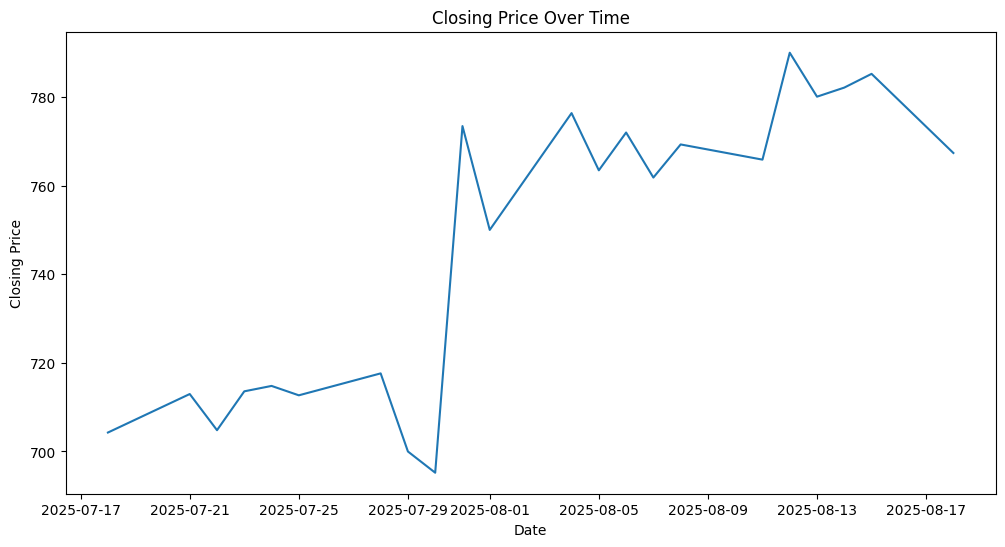

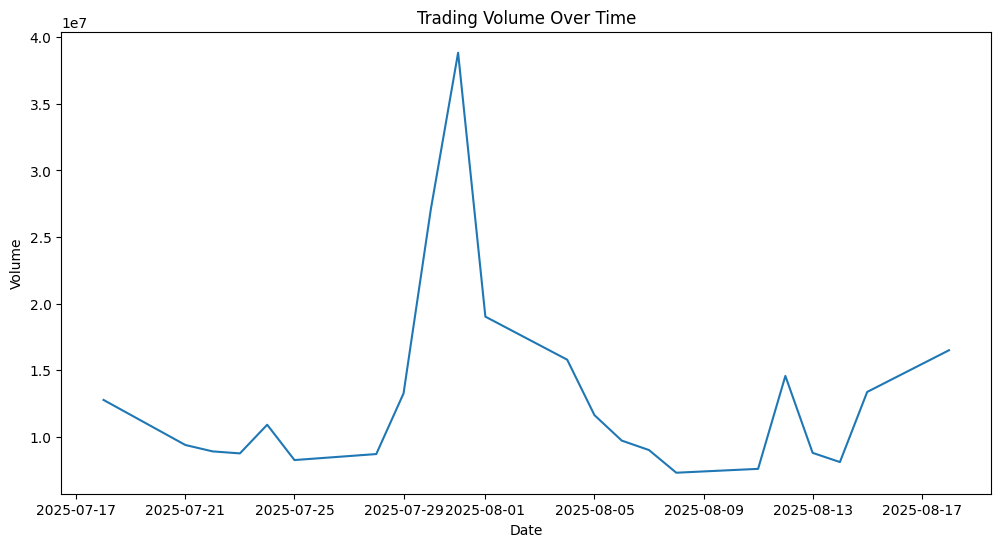

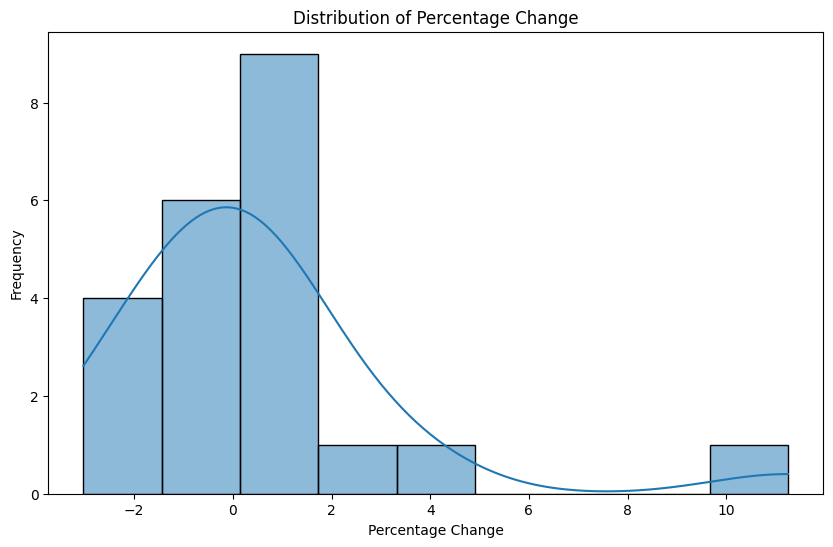

In [53]:
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['closing price'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Price Over Time')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['volume'])
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Trading Volume Over Time')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['percentage change'], kde=True)
plt.xlabel('Percentage Change')
plt.ylabel('Frequency')
plt.title('Distribution of Percentage Change')
plt.show()

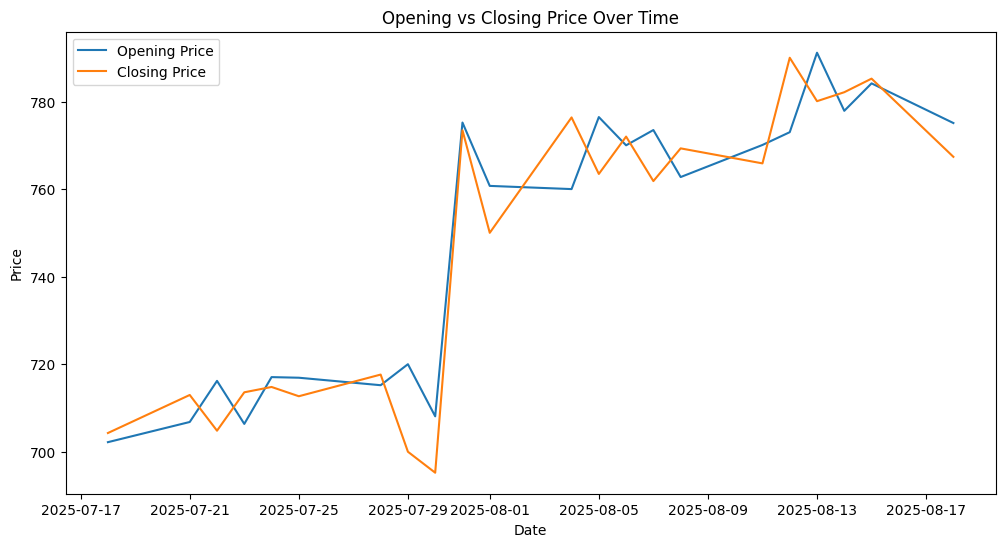

In [54]:
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['opening price'], label='Opening Price')
plt.plot(df['date'], df['closing price'], label='Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Opening vs Closing Price Over Time')
plt.legend()
plt.show()

In [59]:
df['SMA_7'] = df['closing price'].rolling(window=7).mean()
df['EMA_7'] = df['closing price'].ewm(span=7, adjust=False).mean()
display(df[['date', 'closing price', 'SMA_7', 'EMA_7']])

,date,closing price,SMA_7,EMA_7
0,2025-08-18,767.37,NaN,767.370000
1,2025-08-15,785.23,NaN,771.835000
2,2025-08-14,782.13,NaN,774.408750
3,2025-08-13,780.08,NaN,775.826563
4,2025-08-12,790.00,NaN,779.369922
5,2025-08-11,765.87,NaN,775.994941
6,2025-08-08,769.30,777.140000,774.321206
7,2025-08-07,761.83,776.348571,771.198405
8,2025-08-06,771.99,774.457143,771.396303
9,2025-08-05,763.46,771.790000,769.412228


In [61]:
# Calculate the highest high and lowest low over the past 7 days
df['Highest_High_7'] = df['high'].rolling(window=7).max()
df['Lowest_Low_7'] = df['low'].rolling(window=7).min()

# Calculate the 7-day Stochastic Oscillator
df['Stochastic_Oscillator_7'] = ((df['closing price'] - df['Lowest_Low_7']) / (df['Highest_High_7'] - df['Lowest_Low_7'])) * 100

display(df)

,date,closing price,opening price,high,low,volume,percentage change,SMA_7,EMA_7,Highest_High_7,Lowest_Low_7,Stochastic_Oscillator_7
0,2025-08-18,767.37,775.09,775.81,756.56,16510000.0,-2.27,NaN,767.370000,NaN,NaN,NaN
1,2025-08-15,785.23,784.15,796.25,780.82,13380000.0,0.40,NaN,771.835000,NaN,NaN,NaN
2,2025-08-14,782.13,777.88,787.81,772.51,8120000.0,0.26,NaN,774.408750,NaN,NaN,NaN
3,2025-08-13,780.08,791.15,795.46,778.23,8810000.0,-1.26,NaN,775.826563,NaN,NaN,NaN
4,2025-08-12,790.00,773.00,793.67,772.43,14580000.0,3.15,NaN,779.369922,NaN,NaN,NaN
5,2025-08-11,765.87,770.08,773.46,764.67,7610000.0,-0.45,NaN,775.994941,NaN,NaN,NaN
6,2025-08-08,769.30,762.75,769.90,758.58,7320000.0,0.98,777.140000,774.321206,796.25,756.56,32.098765
7,2025-08-07,761.83,773.49,775.00,759.55,9020000.0,-1.32,776.348571,771.198405,796.25,758.58,8.627555
8,2025-08-06,771.99,770.00,773.64,760.46,9730000.0,1.12,774.457143,771.396303,795.46,758.58,36.361171
9,2025-08-05,763.46,776.45,783.13,763.00,11640000.0,-1.66,771.790000,769.412228,795.46,758.58,13.232104


In [62]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Prepare data
# Use all columns as features except the target ('closing price') and the 'date' column
features = df.drop(['closing price', 'date'], axis=1)
target = df['closing price']

# For a time series prediction, it's generally better to split the data chronologically
train_size = int(len(df) * 0.8) # Using 80% of data for training
train_features, test_features = features[0:train_size], features[train_size:len(df)]
train_target, test_target = target[0:train_size], target[train_size:len(df)]

# Initialize and train the Decision Tree Regressor model
model = DecisionTreeRegressor(random_state=42)
model.fit(train_features, train_target)

# Make predictions on the test set
predictions = model.predict(test_features)

# Evaluate the model (optional)
mse = mean_squared_error(test_target, predictions)
print(f'Mean Squared Error: {mse}')



Mean Squared Error: 80.42014000000026


In [64]:
# Create a DataFrame with dates for prediction
future_dates = pd.to_datetime(['2025-08-19', '2025-08-20', '2025-08-21', '2025-08-22'])

# Create a DataFrame with predictor variables for the future dates
# Replace the placeholder values with actual values for accurate predictions
future_data = pd.DataFrame({
    'opening price': [767.12,747.57, 744.705, 739.23],  # Replace with actual Open prices
    'high': [767.17, 750.1999, 745.50, 756.90],  # Replace with actual High prices
    'low': [749.36, 731.00,733.1101, 734.39],   # Replace with actual Low prices
    'volume': [12286690, 11898190, 8876307, 10612670],       # Replace with actual Volume
    # Add placeholder values for technical indicators as they are used as features
    'percentage change': [0] * len(future_dates), # Replace with actual percentage change or use a forecasting method
    'SMA_7': [0] * len(future_dates), # Replace with actual SMA_7 or use a forecasting method
    'EMA_7': [0] * len(future_dates), # Replace with actual EMA_7 or use a forecasting method
    'Highest_High_7': [0] * len(future_dates), # Replace with actual Highest_High_7 or use a forecasting method
    'Lowest_Low_7': [0] * len(future_dates), # Replace with actual Lowest_Low_7 or use a forecasting method
    'Stochastic_Oscillator_7': [0] * len(future_dates) # Replace with actual Stochastic_Oscillator_7 or use a forecasting method

}, index=future_dates)

# Ensure the column order matches the training data
future_data = future_data[train_features.columns]

# Predict the 'Close/Last' price for the future dates
predicted_prices = model.predict(future_data)

# Display the predicted prices
print("\nPredicted Close Prices for future dates:")
for date, price in zip(future_dates, predicted_prices):
    print(f"Predicted Close Price for {date.strftime('%Y-%m-%d')}: {price:.2f}")


Predicted Close Prices for future dates:
Predicted Close Price for 2025-08-19: 717.63
Predicted Close Price for 2025-08-20: 717.63
Predicted Close Price for 2025-08-21: 717.63
Predicted Close Price for 2025-08-22: 717.63


In [65]:
# Create lagged features for SMA and EMA
df['SMA_7_lagged'] = df['SMA_7'].shift(1)
df['EMA_7_lagged'] = df['EMA_7'].shift(1)

# Drop rows with NaN values created by shifting
df_lagged = df.dropna()

# Prepare data for the model
features_lagged = df_lagged[['SMA_7_lagged', 'EMA_7_lagged']]
target_lagged = df_lagged['closing price']

# Split data into training and testing sets (chronological split)
train_size_lagged = int(len(df_lagged) * 0.8)
train_features_lagged, test_features_lagged = features_lagged[0:train_size_lagged], features_lagged[train_size_lagged:len(df_lagged)]
train_target_lagged, test_target_lagged = target_lagged[0:train_size_lagged], target_lagged[train_size_lagged:len(df_lagged)]

# Initialize and train the Decision Tree Regressor model
model_lagged = DecisionTreeRegressor(random_state=42)
model_lagged.fit(train_features_lagged, train_target_lagged)

# Make predictions on the test set
predictions_lagged = model_lagged.predict(test_features_lagged)

# Evaluate the model (optional)
mse_lagged = mean_squared_error(test_target_lagged, predictions_lagged)
print(f'Mean Squared Error with lagged features: {mse_lagged}')

# Display predictions for the test set
print("\nPredictions for the test set using lagged features:")
for i in range(len(predictions_lagged)):
    print(f"Date: {df_lagged['date'].iloc[train_size_lagged + i].strftime('%d-%m-%Y')}, Predicted: {predictions_lagged[i]:.2f}, Actual: {test_target_lagged.iloc[i]:.2f}")

Mean Squared Error with lagged features: 54.591666666667656

Predictions for the test set using lagged features:
Date: 22-07-2025, Predicted: 713.58, Actual: 704.81
Date: 21-07-2025, Predicted: 713.58, Actual: 712.97
Date: 18-07-2025, Predicted: 713.58, Actual: 704.28
